
Content
1. Data Cleaning
2. Exploratory Visualization 
3. Feature Engineering
4. Modeling & Evaluation
5. Ensemble Methods


In [4]:
pwd

'/home/arshleykim/Desktop/projects'

In [58]:
#loading the train and test files
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [59]:
Id = test_df['Id']

In [6]:
##Dropping the ID colunm (not necessary for prediction)
train_df.drop("Id",axis=1,inplace=True)
test_df.drop("Id",axis=1,inplace=True)

In [7]:
print("Train data: \n")
print("colunms:"+ str (train_df.shape[1]))
print("rows:"+ str (train_df.shape[0]))

print('\nTest data:\n')
print("columns:"+ str(test_df.shape[1]))
print("rows:"+ str(test_df.shape[0]))

Train data: 

colunms:80
rows:1460

Test data:

columns:79
rows:1459


In [8]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
##descriptive statistics summary
print(train_df['SalePrice'])

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
         ...  
1430    192140
1431    143750
1432     64500
1433    186500
1434    160000
1435    174000
1436    120500
1437    394617
1438    149700
1439    197000
1440    191000
1441    149300
1442    310000
1443    121000
1444    179600
1445    129000
1446    157900
1447    240000
1448    112000
1449     92000
1450    136000
1451    287090
1452    145000
1453     84500
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [10]:
## descriptive summary
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [11]:
##exploratory
import seaborn as sns 
from scipy import stats
from scipy.stats import skew,norm
import matplotlib.pyplot as plt
#Kernel Density plot
sns.distplot(train_df.SalePrice, fit=norm);
plt.ylabel = ('Frequency')
plt.tittle = ('SalePrice Distristribution');
##fitted parameters used
(mu,sigma) = norm.fit(train_df['SalePrice']);
##QQ plot
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'],plot = plt)
plt.show()
print("skewness:%f" % train_df['SalePrice'].skew())
print("kurtosis:%f" % train_df['SalePrice'].kurt())

skewness:1.882876
kurtosis:6.536282


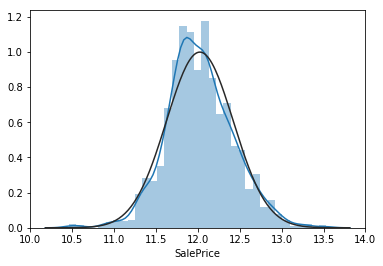

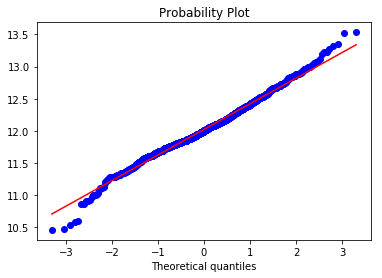

In [12]:
## log transformation the target
import numpy as np
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])
## Kernel density plot
sns.distplot(train_df.SalePrice, fit=norm);
plt.ylabel = ('Frequency')
plt.tittle = ('SalePrice Distristribution');
##fitted parameters used
(mu,sigma) = norm.fit(train_df['SalePrice']);
##QQ plot
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'],plot = plt)
plt.show()


In [13]:
print("skewness:%f" % train_df['SalePrice'].skew())
print("kurtosis:%f" % train_df['SalePrice'].kurt())

skewness:0.121347
kurtosis:0.809519


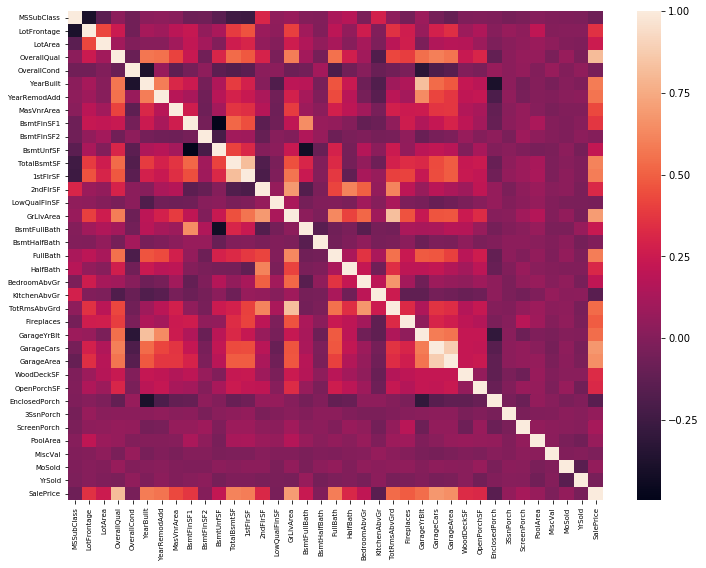

In [14]:
# Create a heatmap correlation to find relevant variables
corr = train_df.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr)
plt.yticks(rotation=0, size=7)
plt.xticks(rotation=90, size=7)
plt.show()

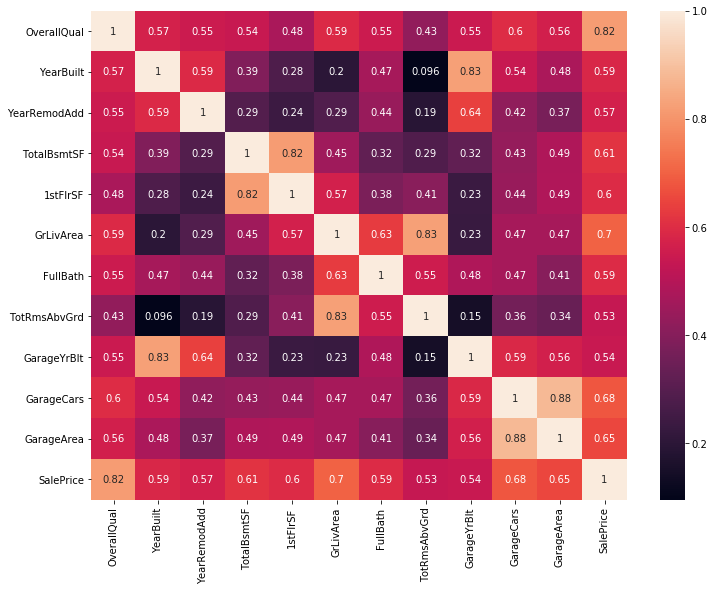

In [15]:
# Select columns with a correlation > 0.5
cor_vars = corr.SalePrice[(corr.SalePrice > 0.5)]
cor_cols = list(cor_vars.index.values)

corr2 = train_df[cor_cols].corr()
plt.figure(figsize=(12,9))
hm = sns.heatmap(corr2, annot=True, annot_kws={'size':10})
plt.yticks(rotation=0, size=10)
plt.xticks(rotation=90, size=10)
plt.show()

In [16]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220


### Dealing with missing values

In [17]:
##inputing the missing values
train_df.shape

(1460, 80)

In [18]:
#getting the missing ratio of each feature
data2 = pd.concat((train_df.loc[:, 'MSSubClass': 'SaleCondition'],
                     test_df.loc[:,'MSSubClass':'SaleCondition']))
print("data2 size is: {} ".format(data2.shape))
data2_na = (data2.isnull().sum()/ len(data2)) * 100
data2_na = data2_na.drop(data2_na[data2_na == 0].index).sort_values(ascending = False)
# [:30]
missing_data =pd.DataFrame({'Missing Ratio':data2_na})
missing_data.head(20)

data2 size is: (2919, 79) 


,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageYrBlt,5.447071
GarageQual,5.447071
GarageCond,5.447071


In [19]:
for col in ('PoolQC','MiscFeature','GarageType','Alley','Fence','FireplaceQu','GarageFinish',
           'GarageQual','GarageCond','MasVnrType','LotFrontage','MSSubClass'):
    data2[col] = data2[col].fillna('None')

In [20]:
print(data2.head(20))

    MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0           60       RL          65     8450   Pave  None      Reg   
1           20       RL          80     9600   Pave  None      Reg   
2           60       RL          68    11250   Pave  None      IR1   
3           70       RL          60     9550   Pave  None      IR1   
4           60       RL          84    14260   Pave  None      IR1   
5           50       RL          85    14115   Pave  None      IR1   
6           20       RL          75    10084   Pave  None      Reg   
7           60       RL        None    10382   Pave  None      IR1   
8           50       RM          51     6120   Pave  None      Reg   
9          190       RL          50     7420   Pave  None      Reg   
10          20       RL          70    11200   Pave  None      Reg   
11          60       RL          85    11924   Pave  None      IR1   
12          20       RL        None    12968   Pave  None      IR2   
13          20      

In [21]:
#Replacing missing value with 0(since no garage = no cars in such garage)
for col in ('GarageYrBlt','GarageArea', 'GarageCars'):
    data2[col] = data2[col].fillna(0)

In [22]:
print(data2)

      MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0             60       RL          65     8450   Pave  None      Reg   
1             20       RL          80     9600   Pave  None      Reg   
2             60       RL          68    11250   Pave  None      IR1   
3             70       RL          60     9550   Pave  None      IR1   
4             60       RL          84    14260   Pave  None      IR1   
5             50       RL          85    14115   Pave  None      IR1   
6             20       RL          75    10084   Pave  None      Reg   
7             60       RL        None    10382   Pave  None      IR1   
8             50       RM          51     6120   Pave  None      Reg   
9            190       RL          50     7420   Pave  None      Reg   
10            20       RL          70    11200   Pave  None      Reg   
11            60       RL          85    11924   Pave  None      IR1   
12            20       RL        None    12968   Pave  None     

In [23]:
## basement being o;
for col in ('BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF','BsmtFullBath',
            'BsmtHalfBath'):
    data2[col] = data2[col].fillna(0)
data2["MasVnrArea"] = data2["MasVnrArea"].fillna(0)
for col in ('BsmtQual', 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'):
    data2[col] = data2[col].fillna('None')
    


In [24]:
print(data2)

      MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0             60       RL          65     8450   Pave  None      Reg   
1             20       RL          80     9600   Pave  None      Reg   
2             60       RL          68    11250   Pave  None      IR1   
3             70       RL          60     9550   Pave  None      IR1   
4             60       RL          84    14260   Pave  None      IR1   
5             50       RL          85    14115   Pave  None      IR1   
6             20       RL          75    10084   Pave  None      Reg   
7             60       RL        None    10382   Pave  None      IR1   
8             50       RM          51     6120   Pave  None      Reg   
9            190       RL          50     7420   Pave  None      Reg   
10            20       RL          70    11200   Pave  None      Reg   
11            60       RL          85    11924   Pave  None      IR1   
12            20       RL        None    12968   Pave  None     

In [25]:
data2['LotFrontage']

0         65
1         80
2         68
3         60
4         84
5         85
6         75
7       None
8         51
9         50
10        70
11        85
12      None
13        91
14      None
15        51
16      None
17        72
18        66
19        70
20       101
21        57
22        75
23        44
24      None
25       110
26        60
27        98
28        47
29        60
        ... 
1429      50
1430      75
1431      69
1432      50
1433      60
1434      41
1435      44
1436      69
1437      65
1438      70
1439     140
1440    None
1441    None
1442      95
1443      88
1444     125
1445      78
1446      41
1447      58
1448    None
1449      21
1450      21
1451      80
1452      21
1453      21
1454      21
1455      21
1456     160
1457      62
1458      74
Name: LotFrontage, Length: 2919, dtype: object

In [26]:
data2['LotFrontage']

0         65
1         80
2         68
3         60
4         84
5         85
6         75
7       None
8         51
9         50
10        70
11        85
12      None
13        91
14      None
15        51
16      None
17        72
18        66
19        70
20       101
21        57
22        75
23        44
24      None
25       110
26        60
27        98
28        47
29        60
        ... 
1429      50
1430      75
1431      69
1432      50
1433      60
1434      41
1435      44
1436      69
1437      65
1438      70
1439     140
1440    None
1441    None
1442      95
1443      88
1444     125
1445      78
1446      41
1447      58
1448    None
1449      21
1450      21
1451      80
1452      21
1453      21
1454      21
1455      21
1456     160
1457      62
1458      74
Name: LotFrontage, Length: 2919, dtype: object

In [27]:
data2['LotFrontage'].replace('None',np.nan,inplace = True)

In [28]:
print(data2['LotFrontage'])

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
5        85.0
6        75.0
7         NaN
8        51.0
9        50.0
10       70.0
11       85.0
12        NaN
13       91.0
14        NaN
15       51.0
16        NaN
17       72.0
18       66.0
19       70.0
20      101.0
21       57.0
22       75.0
23       44.0
24        NaN
25      110.0
26       60.0
27       98.0
28       47.0
29       60.0
        ...  
1429     50.0
1430     75.0
1431     69.0
1432     50.0
1433     60.0
1434     41.0
1435     44.0
1436     69.0
1437     65.0
1438     70.0
1439    140.0
1440      NaN
1441      NaN
1442     95.0
1443     88.0
1444    125.0
1445     78.0
1446     41.0
1447     58.0
1448      NaN
1449     21.0
1450     21.0
1451     80.0
1452     21.0
1453     21.0
1454     21.0
1455     21.0
1456    160.0
1457     62.0
1458     74.0
Name: LotFrontage, Length: 2919, dtype: float64


In [29]:
data2['LotFrontage'] = data2['LotFrontage'].fillna((data2['LotFrontage'].median()))

In [30]:
print(data2['LotFrontage'])

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
5        85.0
6        75.0
7        68.0
8        51.0
9        50.0
10       70.0
11       85.0
12       68.0
13       91.0
14       68.0
15       51.0
16       68.0
17       72.0
18       66.0
19       70.0
20      101.0
21       57.0
22       75.0
23       44.0
24       68.0
25      110.0
26       60.0
27       98.0
28       47.0
29       60.0
        ...  
1429     50.0
1430     75.0
1431     69.0
1432     50.0
1433     60.0
1434     41.0
1435     44.0
1436     69.0
1437     65.0
1438     70.0
1439    140.0
1440     68.0
1441     68.0
1442     95.0
1443     88.0
1444    125.0
1445     78.0
1446     41.0
1447     58.0
1448     68.0
1449     21.0
1450     21.0
1451     80.0
1452     21.0
1453     21.0
1454     21.0
1455     21.0
1456    160.0
1457     62.0
1458     74.0
Name: LotFrontage, Length: 2919, dtype: float64


In [31]:
print(data2)


      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave  None      Reg   
1             20       RL         80.0     9600   Pave  None      Reg   
2             60       RL         68.0    11250   Pave  None      IR1   
3             70       RL         60.0     9550   Pave  None      IR1   
4             60       RL         84.0    14260   Pave  None      IR1   
5             50       RL         85.0    14115   Pave  None      IR1   
6             20       RL         75.0    10084   Pave  None      Reg   
7             60       RL         68.0    10382   Pave  None      IR1   
8             50       RM         51.0     6120   Pave  None      Reg   
9            190       RL         50.0     7420   Pave  None      Reg   
10            20       RL         70.0    11200   Pave  None      Reg   
11            60       RL         85.0    11924   Pave  None      IR1   
12            20       RL         68.0    12968   P

In [32]:
#msZoning classification: 'RL' is common
data2['MSZoning'] = data2['MSZoning'].fillna(data2['MSZoning'].mode()[0])

#functional: NA is typical
data2["Functional"] = data2["Functional"].fillna('Typ')

#Electrical
data2['Electrical'] = data2['Electrical'].fillna(data2['Electrical'].mode()[0])

#KitchenQual
data2['KitchenQual'] =data2['KitchenQual'].fillna(data2['KitchenQual'].mode()[0])

#Extrerior !st and Exterior 2nd
data2 ['Exterior1st']= data2['Exterior1st'].fillna(data2['Exterior1st'].mode()[0])
data2['Exterior2nd']= data2['Exterior2nd'].fillna(data2['Exterior2nd'].mode()[0])

#sale type
data2['SaleType'] = data2['SaleType'].fillna(data2['SaleType'].mode()[0])

In [33]:
print(data2)

      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave  None      Reg   
1             20       RL         80.0     9600   Pave  None      Reg   
2             60       RL         68.0    11250   Pave  None      IR1   
3             70       RL         60.0     9550   Pave  None      IR1   
4             60       RL         84.0    14260   Pave  None      IR1   
5             50       RL         85.0    14115   Pave  None      IR1   
6             20       RL         75.0    10084   Pave  None      Reg   
7             60       RL         68.0    10382   Pave  None      IR1   
8             50       RM         51.0     6120   Pave  None      Reg   
9            190       RL         50.0     7420   Pave  None      Reg   
10            20       RL         70.0    11200   Pave  None      Reg   
11            60       RL         85.0    11924   Pave  None      IR1   
12            20       RL         68.0    12968   P

In [34]:
data2 = data2.drop(['Utilities'], axis=1)

In [35]:
print(data2)

      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave  None      Reg   
1             20       RL         80.0     9600   Pave  None      Reg   
2             60       RL         68.0    11250   Pave  None      IR1   
3             70       RL         60.0     9550   Pave  None      IR1   
4             60       RL         84.0    14260   Pave  None      IR1   
5             50       RL         85.0    14115   Pave  None      IR1   
6             20       RL         75.0    10084   Pave  None      Reg   
7             60       RL         68.0    10382   Pave  None      IR1   
8             50       RM         51.0     6120   Pave  None      Reg   
9            190       RL         50.0     7420   Pave  None      Reg   
10            20       RL         70.0    11200   Pave  None      Reg   
11            60       RL         85.0    11924   Pave  None      IR1   
12            20       RL         68.0    12968   P

In [36]:
#Transforming required numerical features to categorical 
data2['MSSubClass']= data2['MSSubClass'].apply(str)
data2['OverallCond'] =data2['OverallCond'].astype(str)
data2['YrSold'] = data2['YrSold'].astype(str)
data2['MoSold'] = data2['MoSold'].astype(str)


In [37]:
#Label Encoding some categorical variable
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
#apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(data2[c].values))
    data2[c] = lbl.transform(list(data2[c].values))
print(data2.shape)

(2919, 78)


In [38]:
#add total surface area as TotalSf = basement + firstflr + secondflr
data2['TotalSF'] = data2['TotalBsmtSF'] + data2['1stFlrSF'] + data2['2ndFlrSF']

In [39]:
#add 'age' feature
data2['Age'] = data2['YrSold'] - data2['YearBuilt']

In [40]:
print(data2.shape)

(2919, 80)


In [41]:
#log transform skewed numeric features 
numeric_features = data2.dtypes[data2.dtypes != "object"].index
skewed_features = data2[numeric_features].apply(lambda x : skew (x.dropna())).sort_values(ascending=False)
#compute skewness
print ("\skew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_features})   
skewness.head(10)

\skew in numerical features: 



,Skew
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
LandSlope,4.975157
KitchenAbvGr,4.302254
BsmtFinSF2,4.146143
EnclosedPorch,4.003891
ScreenPorch,3.946694


In [42]:
skewness = skewness[abs(skewness) > 0.75]
print ("There are {} skewed numerical features to box cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p 
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    data2[feat] = boxcox1p(data2[feat], lam)

There are 60 skewed numerical features to box cox transform


In [43]:
data2 = pd.get_dummies(data2)
print(data2.shape)

(2919, 222)


In [44]:
train_df['SalePrice']

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
5       11.870607
6       12.634606
7       12.206078
8       11.774528
9       11.678448
10      11.771444
11      12.751303
12      11.877576
13      12.540761
14      11.964007
15      11.790565
16      11.911708
17      11.407576
18      11.976666
19      11.842236
20      12.692506
21      11.845110
22      12.345839
23      11.774528
24      11.944714
25      12.454108
26      11.811555
27      12.631344
28      12.242891
29      11.134604
          ...    
1430    12.165985
1431    11.875838
1432    11.074436
1433    12.136192
1434    11.982935
1435    12.066816
1436    11.699413
1437    12.885673
1438    11.916395
1439    12.190964
1440    12.160034
1441    11.913720
1442    12.644331
1443    11.703554
1444    12.098493
1445    11.767575
1446    11.969724
1447    12.388398
1448    11.626263
1449    11.429555
1450    11.820418
1451    12.567555
1452    11.884496
1453    11.344519
1454    12

In [45]:
##log transformation on Saleprice
np.log(train_df['SalePrice'])

0       2.505338
1       2.493950
2       2.510994
3       2.472278
4       2.520050
5       2.474065
6       2.536440
7       2.501934
8       2.465939
9       2.457745
10      2.465677
11      2.545633
12      2.474652
13      2.528984
14      2.481903
15      2.467300
16      2.477522
17      2.434278
18      2.482960
19      2.471672
20      2.541012
21      2.471915
22      2.513319
23      2.465939
24      2.480289
25      2.522051
26      2.469078
27      2.536181
28      2.504945
29      2.410058
          ...   
1430    2.498644
1431    2.474506
1432    2.404639
1433    2.496192
1434    2.483484
1435    2.490459
1436    2.459539
1437    2.556116
1438    2.477915
1439    2.500695
1440    2.498155
1441    2.477691
1442    2.537209
1443    2.459893
1444    2.493081
1445    2.465348
1446    2.482380
1447    2.516760
1448    2.453267
1449    2.436203
1450    2.469828
1451    2.531118
1452    2.475235
1453    2.428735
1454    2.495526
1455    2.490934
1456    2.505923
1457    2.5251

In [46]:
# Create matrix with independent variables
X = data2[cor_cols[:-1]].iloc[:,0:].values
y = data2.iloc[:, -1].values

In [47]:
# Create training and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 5)

In [48]:
 # Fit Random Forest on Training Set
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [49]:
# accuracy calculation
score_value = regressor.score(X_train, y_train)
score_value
print("Test set accuracy: {}".format(score_value))


Test set accuracy: 0.9205333679240367


In [50]:
#predict new result
y_pred = regressor.predict(X_test)

In [51]:
from sklearn.metrics import mean_squared_error as MSE

In [52]:
#compute mse_dt
mse_dt = MSE(y_test,y_pred)

In [53]:
#compute rmse_dt
rmse_dt = mse_dt**(0.5)

In [54]:
print('Test set RMSE:{}'.format(rmse_dt))

Test set RMSE:0.19284274622523268


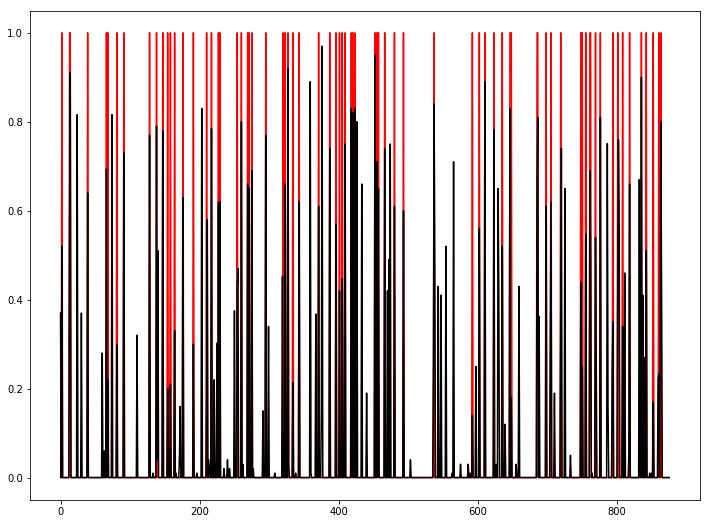

In [55]:
# Plot y_test vs y_pred
plt.figure(figsize=(12,9))
plt.plot(y_test, color='red')
plt.plot(y_pred, color='black')
plt.show()

In [ ]:
plt.

In [67]:
idd = Id.head(876)
idd

0      1461
1      1462
2      1463
3      1464
4      1465
5      1466
6      1467
7      1468
8      1469
9      1470
10     1471
11     1472
12     1473
13     1474
14     1475
15     1476
16     1477
17     1478
18     1479
19     1480
20     1481
21     1482
22     1483
23     1484
24     1485
25     1486
26     1487
27     1488
28     1489
29     1490
       ... 
846    2307
847    2308
848    2309
849    2310
850    2311
851    2312
852    2313
853    2314
854    2315
855    2316
856    2317
857    2318
858    2319
859    2320
860    2321
861    2322
862    2323
863    2324
864    2325
865    2326
866    2327
867    2328
868    2329
869    2330
870    2331
871    2332
872    2333
873    2334
874    2335
875    2336
Name: Id, Length: 876, dtype: int64

In [69]:
submission = pd.DataFrame({'Id':idd,'SalePrice':y_pred})                     

In [75]:
submission.head(4)

,Id,SalePrice
0,1461,0.370000
1,1462,0.000000
2,1463,0.520833
3,1464,0.000000


In [77]:
submission.to_csv('submission.csv',index = False)

In [79]:
submission.head(4)

,Id,SalePrice
0,1461,0.370000
1,1462,0.000000
2,1463,0.520833
3,1464,0.000000
